# Standard problem 3

## Problem specification

This problem is to calculate a single domain limit of a cubic magnetic particle. This is the size $L$ of equal energy for the so-called flower state (which one may also call a splayed state or a modified single-domain state) on the one hand, and the vortex or curling state on the other hand.

Geometry:

A cube with edge length, $L$, expressed in units of the intrinsic length scale, $l_\text{ex} = \sqrt{A/K_\text{m}}$, where $K_\text{m}$ is a magnetostatic energy density, $K_\text{m} = \frac{1}{2}\mu_{0}M_\text{s}^{2}$.

Material parameters: 

- uniaxial anisotropy $K_\text{u}$ with $K_\text{u} = 0.1 K_\text{m}$, and with the easy axis directed parallel to a principal axis of the cube (0, 0, 1),
- exchange energy constant is $A = \frac{1}{2}\mu_{0}M_\text{s}^{2}l_\text{ex}^{2}$.

More details about the standard problem 3 can be found in Ref. 1.

## Simulation

Firstly, we import all necessary modules.

In [1]:
import discretisedfield as df
import micromagneticmodel as mm
import oommfc as oc

The following two functions are used for initialising the system's magnetisation [1].

In [2]:
import numpy as np

# Function for initiaising the flower state.
def m_init_flower(pos):
    x, y, z = pos[0]/1e-9, pos[1]/1e-9, pos[2]/1e-9
    mx = 0
    my = 2*z - 1
    mz = -2*y + 1
    norm_squared = mx**2 + my**2 + mz**2
    if norm_squared <= 0.05:
        return (1, 0, 0)
    else:
        return (mx, my, mz)

# Function for initialising the vortex state.
def m_init_vortex(pos):
    x, y, z = pos[0]/1e-9, pos[1]/1e-9, pos[2]/1e-9
    mx = 0
    my = np.sin(np.pi/2 * (x-0.5))
    mz = np.cos(np.pi/2 * (x-0.5))
    
    return (mx, my, mz)

The following function is used for convenience. It takes two arguments:

- $L$ - the cube edge length in units of $l_\text{ex}$, and
- the function for initialising the system's magnetisation.

It returns the relaxed system object.

Please refer to other tutorials for more details on how to create system objects and drive them using specific drivers.

In [3]:
def minimise_system_energy(L, m_init):
    print("L={:7}, {} ".format(L, m_init.__name__), end="")
    N = 16  # discretisation in one dimension
    cubesize = 100e-9  # cube edge length (m)
    cellsize = cubesize/N  # discretisation in all three dimensions.
    lex = cubesize/L  # exchange length.
    
    Km = 1e6  # magnetostatic energy density (J/m**3)
    Ms = np.sqrt(2*Km/mm.consts.mu0)  # magnetisation saturation (A/m)
    A = 0.5 * mm.consts.mu0 * Ms**2 * lex**2  # exchange energy constant
    K = 0.1*Km  # Uniaxial anisotropy constant
    u = (0, 0, 1)  # Uniaxial anisotropy easy-axis

    p1 = (0, 0, 0)  # Minimum sample coordinate.
    p2 = (cubesize, cubesize, cubesize)  # Maximum sample coordinate.
    cell = (cellsize, cellsize, cellsize)  # Discretisation.
    mesh = df.Mesh(p1=(0, 0, 0), p2=(cubesize, cubesize, cubesize),
                   cell=(cellsize, cellsize, cellsize))  # Create a mesh object.

    system = mm.System(name='stdprob3')
    system.energy = mm.Exchange(A=A) + mm.UniaxialAnisotropy(K=K, u=u) + mm.Demag()
    system.m = df.Field(mesh, nvdim=3, value=m_init, norm=Ms)

    md = oc.MinDriver()
    md.drive(system, overwrite=True)
    
    return system

### Relaxed magnetisation states

Now, we show the magnetisation configurations of two relaxed states.

**Vortex** state:

L=      8, m_init_vortex Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:56]... (1.6 s)


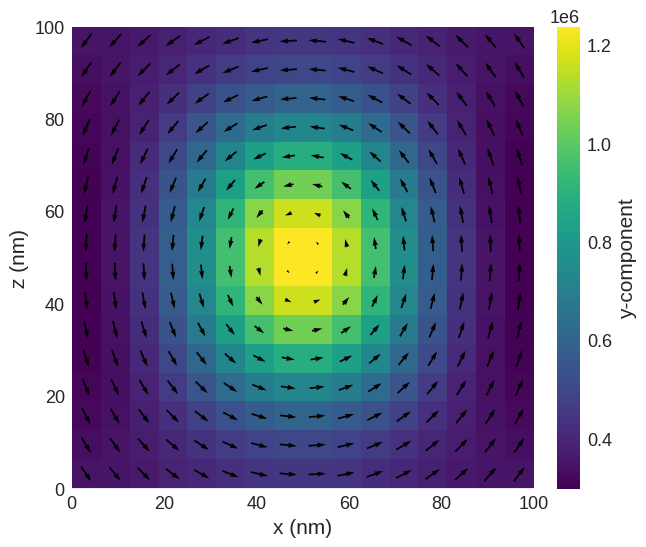

In [4]:
# NBVAL_IGNORE_OUTPUT
system = minimise_system_energy(8, m_init_vortex)
system.m.sel('y').mpl()

**Flower** state:

L=      8, m_init_flower Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:56]... (0.4 s)


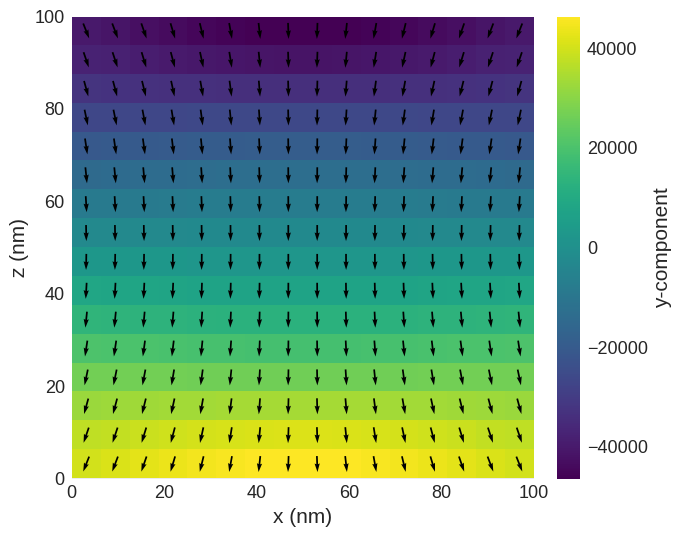

In [5]:
# NBVAL_IGNORE_OUTPUT
system = minimise_system_energy(8, m_init_flower)
system.m.sel('y').mpl()

### Energy crossing

We can plot the energies of both vortex and flower states as a function of cube edge length $L$. This will give us an idea where the state transition occurrs. We can achieve that by simply looping over the edge lengths $L$ of interest, computing the energy of both vortex and flower states, and finally, plotting the energy dependence.

L=    8.0, m_init_vortex Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:56]... (1.2 s)
L=    8.0, m_init_flower Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:56]... (0.4 s)
L=   8.25, m_init_vortex Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:56]... (1.0 s)
L=   8.25, m_init_flower Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:56]... (0.4 s)
L=    8.5, m_init_vortex Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:56]... (0.8 s)
L=    8.5, m_init_flower Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:56]... (0.4 s)
L=   8.75, m_init_vortex Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:57]... (0.8 s)
L=   8.75, m_init_flower Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:57]... (0.4 s)
L=    9.0, m_init_vortex Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:57]... (0.8 s)
L=    9.0, m_init_flower Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:57]... (0.4 s)


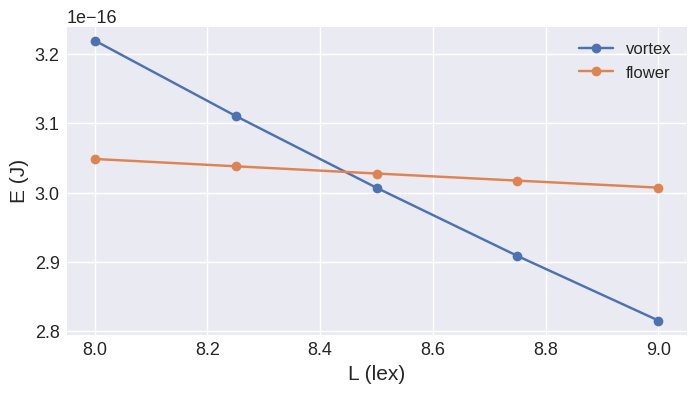

In [6]:
# NBVAL_IGNORE_OUTPUT
L_array = np.linspace(8, 9, 5)
vortex_energies, flower_energies = [], []
for L in L_array:
    vortex = minimise_system_energy(L, m_init_vortex)
    flower = minimise_system_energy(L, m_init_flower)
    vortex_energies.append(vortex.table.data.tail(1)['E'][0])
    flower_energies.append(flower.table.data.tail(1)['E'][0])

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(L_array, vortex_energies, 'o-', label='vortex')
plt.plot(L_array, flower_energies, 'o-', label='flower')
plt.xlabel('L (lex)')
plt.ylabel('E (J)')
plt.grid()
plt.legend();

From the plot, we can see that the energy crossing occurrs between $8.4l_\text{ex}$ and $8.6l_\text{ex}$, so we can employ a root-finding (e.g. bisection) algorithm to find the exact crossing.

In [7]:
# NBVAL_IGNORE_OUTPUT
from scipy.optimize import bisect

def energy_difference(L):
    vortex = minimise_system_energy(L, m_init_vortex)
    flower = minimise_system_energy(L, m_init_flower)
    return (vortex.table.data.tail(1)['E'][0] -
            flower.table.data.tail(1)['E'][0])

cross_section = bisect(energy_difference, 8.4, 8.6, xtol=0.02)

print(f'\nThe energy crossing occurs at {cross_section}*lex')

L=    8.4, m_init_vortex Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:57]... (0.9 s)
L=    8.4, m_init_flower Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:57]... (0.4 s)
L=    8.6, m_init_vortex Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:57]... (0.8 s)
L=    8.6, m_init_flower Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:57]... (0.4 s)
L=    8.5, m_init_vortex Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:57]... (0.8 s)
L=    8.5, m_init_flower Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:57]... (0.4 s)
L=   8.45, m_init_vortex Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:57]... (0.9 s)
L=   8.45, m_init_flower Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:57]... (0.4 s)
L=  8.425, m_init_vortex Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:57]... (0.8 s)
L=  8.425, m_init_flower Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:57]... (0.4 s)
L= 8.4375, m_init_vortex Running OOMMF (ExeOOMMFRunner)[2023/10/23 15:57]... (0.8 s)
L= 8.4375, m_init_flower Running OOMMF (ExeOOMMFRunner)[2023/10/2

## References

[1] µMAG Site Directory http://www.ctcms.nist.gov/~rdm/mumag.org.html